# Group Project

By Carloroberto Escobar, Sabine Salvucci, and Chloe Florit 

11/19/2021


**Group Contribution Statement**

“Carloroberto wrote the data acquisition and preparation. Carloroberto led Figure 1, support vector model, and tables 1 and 2. Chloe led Figure 2 and the logistic regression model. Sabine led Figure 3, nearest neighbor model and created the function used to make the decision regions. All three of us contributed to the automated feature selection, commented on our own models, and worked on the discussion section. We all checked each other’s work and made revisions to code and writing.”

## Data Import and Cleaning

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading data
penguins = pd.read_csv("Palmer_penguins.csv")

penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


First, we imported the data and the modules that we would be using throughout this project. We then chose only the columns that we thought would be best predidictve of a penguins species which include: Island, Sex, Clutch Completion, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Delta 15 N (o/oo) & Delta 13 C (o/oo)

Columns not included: studyName, Sample number, Region, Stage, ID, Date Egg, Comments 

Study name, sample number, ID and comments were not included because these variables primarily served as identification information that would important to the actual research study, but are not at all predictive of a penguins species. 

Region, stage, and date egg were NOT used because all 3 species come from the same region and stage. Furthermore, we did not believe that the birth date of the penguin would be predictive of its species. 


We then abbreviated the species names to Adelie, Chinstrap, and Gentoo for convenience. We also dropped the row of the data frame where the sex was input as '.'

In [5]:
#List of different columns in Penguins data
cols=["Species", "Island", "Sex", "Clutch Completion", "Culmen Length (mm)", "Culmen Depth (mm)",
     "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

#Modify penguins w/ specified cols
penguins = penguins[cols]

penguins

,Species,Island,Sex,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,MALE,Yes,39.1,18.7,181.0,3750.0,NaN,NaN
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,Yes,39.5,17.4,186.0,3800.0,8.94956,-24.69454
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,Yes,40.3,18.0,195.0,3250.0,8.36821,-25.33302
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,FEMALE,Yes,36.7,19.3,193.0,3450.0,8.76651,-25.32426
...,...,...,...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),Biscoe,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE,Yes,46.8,14.3,215.0,4850.0,8.41151,-26.13832
341,Gentoo penguin (Pygoscelis papua),Biscoe,MALE,Yes,50.4,15.7,222.0,5750.0,8.30166,-26.04117
342,Gentoo penguin (Pygoscelis papua),Biscoe,FEMALE,Yes,45.2,14.8,212.0,5200.0,8.24246,-26.11969


In [6]:
penguins["Species"]=penguins["Species"].str.split().str.get(0)

penguins.drop(penguins[penguins['Sex'] == "."].index, inplace = True)

In order to prevent the data from being affected by the preperation, the data was split prior to preparation for later use.

In [7]:

np.random.seed(1234)

train, test = train_test_split(penguins, test_size = 0.2)

Two seperate funtions were used in order to clean and prepare the data. The first function, clean_penguins_data(), cleans the penguins data set in order for expoloratory analysis. prep_penguins_data() prepares the split data for later use in feature selection and other models. 

In [8]:
def clean_penguins_data(data_df):
    """
    This function cleans the data in various ways such as removing NaN values
    and removing unnecessary information.
    
    Parameter data_df: the data frame 
    
    Output: Returns the cleaned data frame
    
    
    """
    
    #Copies the data
    df = data_df.copy()
    
    #Drops all NaN vals
    df = df.dropna()

    #Transforms qual features into quant vals 
    le = preprocessing.LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Species'] = le.fit_transform(df['Species'])
    df['Island'] = le.fit_transform(df['Island'])
    df['Clutch Completion'] = le.fit_transform(df['Clutch Completion'])
    
    X = df.drop(['Species'], axis = 1)
    
    #Target variable 
    y = df["Species"]
    
    
    return (X, y)
    
X_train, y_train = clean_penguins_data(train)
X_test,  y_test  = clean_penguins_data(test)


# Exploratory Analysis 

**Summary Statistics:**

In [9]:
# Checking summary of data


train.describe().round(2)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,272.00,272.00,272.00,272.00,262.00,263.00
mean,44.04,17.08,200.79,4213.97,8.72,-25.68
std,5.43,2.00,14.25,816.17,0.55,0.79
min,32.10,13.10,172.00,2700.00,7.63,-27.02
25%,39.50,15.30,190.00,3550.00,8.29,-26.26
50%,44.90,17.25,197.00,4025.00,8.65,-25.80
75%,48.55,18.60,214.00,4812.50,9.15,-25.09
max,59.60,21.50,231.00,6300.00,9.98,-23.79


Here we print out a table composed of different statistal values in order to simply gauge each column's values. While this table does not give us any real details about what may/may not be a good predictor of Species just yet it does however give us ideas on what may or may not help. For example, Culmen Length and Body Mass seem to have a lot of variation (std) which will be examined in the following sections.

In [10]:
group = ["Species","Sex"]
col = ["Culmen Length (mm)","Flipper Length (mm)", "Body Mass (g)", "Culmen Depth (mm)"]


summary = train.groupby(group)[col].aggregate([np.mean, np.min, np.max, np.std])

summary

Culmen Length (mm)                       Flipper Length (mm)  \
                               mean  amin  amax       std                mean   
Species   Sex                                                                   
Adelie    FEMALE          37.449123  32.1  41.1  1.946253          187.578947   
          MALE            40.283929  34.6  46.0  2.199155          191.500000   
Chinstrap FEMALE          46.835714  42.4  58.0  3.180405          191.000000   
          MALE            51.220000  48.5  55.8  1.614776          200.320000   
Gentoo    FEMALE          45.742000  40.9  50.5  2.030994          212.620000   
          MALE            49.534694  44.4  59.6  2.624448          221.489796   

                                         Body Mass (g)                  \
                   amin   amax       std          mean    amin    amax   
Species   Sex                                                            
Adelie    FEMALE  172.0  199.0  5.257469   3372.807018  2850.0  3900.0   
          MALE    178.0  210.0  6.410219   4001.339286  3325.0  4775.0   
Chinstrap FEMALE  178.0  200.0  5.689496   3486.607143  2700.0  3950.0   
          MALE    191.0  210.0  5.595534   4008.000000  3400.0  4800.0   
Gentoo    FEMALE  203.0  222.0  3.832674   4697.000000  3950.0  5200.0   
          MALE    208.0  231.0  5.888274   5523.979592  4925.0  6300.0   

                             Culmen Depth (mm)                        
                         std              mean  amin  amax       std  
Species   Sex                                                         
Adelie    FEMALE  254.130200         17.566667  15.5  20.7  0.953065  
          MALE    343.591315         19.069643  17.0  21.5  1.073468  
Chinstrap FEMALE  259.047592         17.553571  16.4  19.4  0.769070  
          MALE    317.847579         19.300000  17.5  20.8  0.818026  
Gentoo    FEMALE  288.629768         14.242000  13.1  15.5  0.515114  
          MALE    293.858986         15.702041  14.1  17.3  0.781689

A deeper dive into a few of the predictors according to Species and Sex gives us some interesting insights into how well these would be able to predict species. For starters, the mean of Culmen Length (mm) per species seems to vary a lot in terms of sex  with the greatest difference coming from the chinstrap species. 

**Visualizations:**

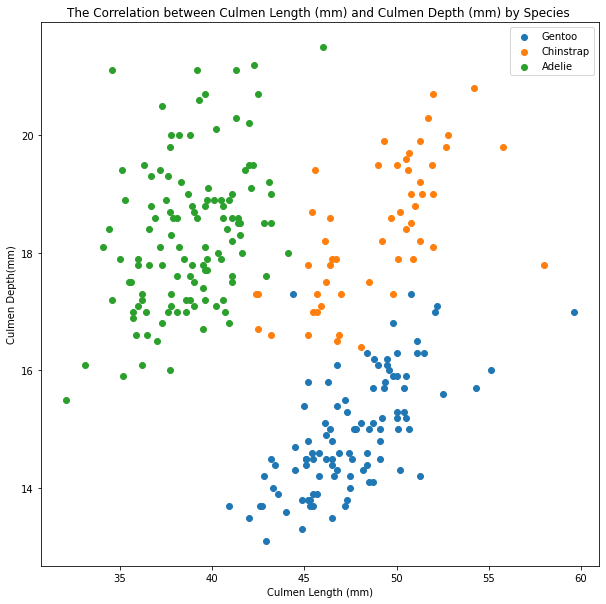

In [11]:
#Scatterplot of Culmen Length vs Culmen Depth
#Creates a figure with 1 axes
fig, ax = plt.subplots(1, figsize=(10, 10))

species = list(set(train["Species"]))


for i in range(len(species)): 
    
    mask_penguins = train["Species"] == species[i]
    newPenguin = train[mask_penguins]
    
    ax.scatter(newPenguin["Culmen Length (mm)"] ,newPenguin["Culmen Depth (mm)"], label = species[i])
    
#Creates labels, legend, and title
plt.xlabel( "Culmen Length (mm)")
plt.ylabel("Culmen Depth(mm)")
ax.legend()
plt.title("The Correlation between Culmen Length (mm) and Culmen Depth (mm) by Species ")
    
plt.show()



As we can see from the scatterplot above, there is a positive correlation between Culmen Length and Culmen Depth for each species of penguin. Furthermore, each species seems to have its data cluttered into specific regions on the graph meaning that there is enough of a difference between the Culmen Length and Flipper Length per species that there is not much room for overlap. 


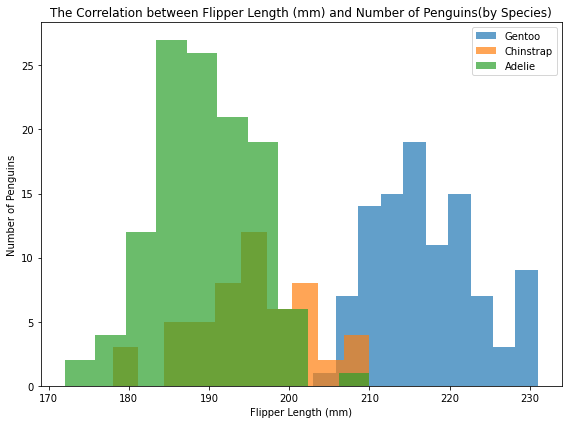

In [12]:
#Histogram of Flipper Length by Species
fig, ax = plt.subplots(1, figsize=(8, 6))


species = list(set(train["Species"]))

    
for i in range(len(species)): 
    
    mask_penguins = train["Species"] == species[i]
    newPenguin = train[mask_penguins]
    
    ax.hist(newPenguin["Flipper Length (mm)"], label = species[i], alpha = 0.7)


ax.set(xlabel="Flipper Length (mm)", ylabel = "Number of Penguins")
ax.legend()

ax.set_title("The Correlation between Flipper Length (mm) and Number of Penguins(by Species)")
plt.tight_layout()

Observing the bar plot, we notice that there is a relationship between Flipper Length and species. Adelie penguins have the smallest flipper length and Gentoo penguins have the largest flipper length. Adelie penguins have a flipper length between 175 and 200. Chinstrap penguins have flipper lengths between 185 and 210. For Gentoo penguins, the flipper length is between 200 and 230. We also notice that Chinstrap and Adelie penguins' flipper lengths overlap more with each other than with the Gentoo penguins. This overlap indicates that flipper length will probably not be as helpful as a feature for modeling. 

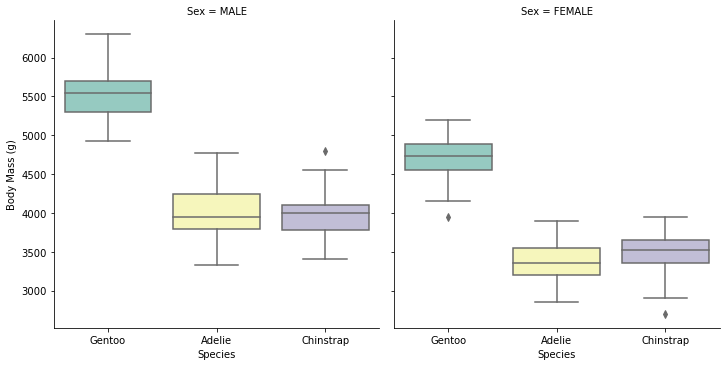

In [13]:
#Box plot of Body Mass by Species and Sex
f=sns.catplot(
    data=train, x='Species', y='Body Mass (g)',
    col='Sex', kind='box', col_wrap=2, palette='Set3'
)

When we consider these boxplots, which represent the body mass of each species by sex, it becomes evident that the mass of each penguin varies by species and is affected by the sex of the penguin. Gentoo penguins are significantly heavier than the Adelie or Chinstrap penguins, which are similar in mass. When we group the penguins by sex, it is also clear that male penguins are heavier than female penguins for all 3 species, a feature that could help our modeling decisions. Although the Adelie and Chinstrap penguins are similar in mass, female Chinstrap penguins are heavier than female Adelie penguins, but male Adelie penguins are heavier than male Chinstrap penguins.

# Automated Feature Selection

In [14]:
LR = LogisticRegression(max_iter = 1000000)


def check_column_score(cols):

    LR = LogisticRegression(max_iter = 1000000)
    
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

In [15]:
combos = [['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Length (mm)', "Body Mass (g)"],
          ['Island', 'Culmen Length (mm)', "Delta 15 N (o/oo)"],
          ['Island', 'Culmen Length (mm)', "Delta 13 C (o/oo)"],
          ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Island', 'Culmen Depth (mm)', "Body Mass (g)"],
          ['Island', 'Culmen Depth (mm)', "Delta 15 N (o/oo)"],
          ['Island', 'Culmen Depth (mm)', "Delta 13 C (o/oo)"],
          ['Island', 'Flipper Length (mm)', "Body Mass (g)"],
          ['Island', 'Flipper Length (mm)', "Delta 15 N (o/oo)"],
          ['Island', 'Flipper Length (mm)', "Delta 13 C (o/oo)"],
          ['Island', 'Body Mass (g)', "Delta 15 N (o/oo)"],
          ['Island', 'Body Mass (g)', "Delta 13 C (o/oo)"],
          ['Island', 'Delta 15 N (o/oo)', "Delta 13 C (o/oo)"],
          ['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Clutch Completion', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Clutch Completion', 'Culmen Length (mm)', "Body Mass (g)"],
          ['Clutch Completion', 'Culmen Length (mm)', "Delta 15 N (o/oo)"],
          ['Clutch Completion', 'Culmen Length (mm)', "Delta 13 C (o/oo)"],
          ['Clutch Completion', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Clutch Completion', 'Culmen Depth (mm)', "Body Mass (g)"],
          ['Clutch Completion', 'Culmen Depth (mm)', "Delta 15 N (o/oo)"],
          ['Clutch Completion', 'Culmen Depth (mm)', "Delta 13 C (o/oo)"],
          ['Clutch Completion', 'Flipper Length (mm)', "Body Mass (g)"],
          ['Clutch Completion', 'Flipper Length (mm)', "Delta 15 N (o/oo)"],
          ['Clutch Completion', 'Flipper Length (mm)', "Delta 13 C (o/oo)"],
          ['Clutch Completion', 'Body Mass (g)', "Delta 15 N (o/oo)"],
          ['Clutch Completion', 'Body Mass (g)', "Delta 13 C (o/oo)"],
          ['Clutch Completion', 'Delta 15 N (o/oo)', "Delta 13 C (o/oo)"],
          ['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'],
          ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Length (mm)', "Body Mass (g)"],
          ['Sex', 'Culmen Length (mm)', "Delta 15 N (o/oo)"],
          ['Sex', 'Culmen Length (mm)', "Delta 13 C (o/oo)"],
          ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)'],
          ['Sex', 'Culmen Depth (mm)', "Body Mass (g)"],
          ['Sex', 'Culmen Depth (mm)', "Delta 15 N (o/oo)"],
          ['Sex', 'Culmen Depth (mm)', "Delta 13 C (o/oo)"],
          ['Sex', 'Flipper Length (mm)', "Body Mass (g)"],
          ['Sex', 'Flipper Length (mm)', "Delta 15 N (o/oo)"],
          ['Sex', 'Flipper Length (mm)', "Delta 13 C (o/oo)"],
          ['Sex', 'Body Mass (g)', "Delta 15 N (o/oo)"],
          ['Sex', 'Body Mass (g)', "Delta 13 C (o/oo)"],
          ['Sex', 'Delta 15 N (o/oo)', "Delta 13 C (o/oo)"]]

In [16]:
 def feature_select(combos):
        best_score = -np.inf
        bestCombo = []
        
        for cols in combos: 
            x = check_column_score(cols)
            
            if x >best_score:
                bestCombo = cols
                best_score = x 
                
        print(bestCombo, best_score)
        return(bestCombo)

In [17]:
trainingColumns = feature_select(combos)

trainingColumns

['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.9883861236802414


['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)']

Based on our automated feature selection, we believe that the quantitative variables Culmen Length (mm) and Culmen Depth (mm) coupled with the qualitative variable Sex are potentially the best predictors of a given penguins species. Out of all of the possible combos, automated feature selection with the logistic regression model scored this combination as as the highest, with a score of 98.8%. This result was evident in our exploratory analysis as well. In the exploratory analysis, we found a positive correlation between Culmen Length and Culmen Depth and clustering by species with little to no overlap between points. We will be using these features more in-depth during the modeling section below. 

# Modeling

As we are primarily working with our selected features from the automated feature selection, we will modify the training and test data below so that it only contains the predictors of interest. We do this to make the rest of the analysis more straightforward. 

In [18]:
#TRAINING MY MODEL 
#Logistic Regression  

trainingColumns = feature_select(combos)

X_train = X_train[trainingColumns]
X_test = X_test[trainingColumns]

['Sex', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 0.9883861236802414


**Logistic Regression**

In [19]:
#Let's find the best parameter for logistic regression 
#First find a couple values for C (0.001,0.01,0.1,1,10,100)

LR = LogisticRegression(max_iter = 1000000, C=0.001)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 0.001",Score)

LR = LogisticRegression(max_iter = 1000000, C=0.01)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 0.01",Score)

LR = LogisticRegression(max_iter = 1000000, C=0.1)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 0.1",Score)

LR = LogisticRegression(max_iter = 1000000, C=1)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 1",Score)

LR = LogisticRegression(max_iter = 1000000, C=10)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 10",Score)

LR = LogisticRegression(max_iter = 1000000, C=100)
Score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
print("Score for 100",Score)

Score for 0.001 0.8062594268476622
Score for 0.01 0.9341628959276017
Score for 0.1 0.9651583710407239
Score for 1 0.9883861236802414
Score for 10 0.9884615384615385
Score for 100 0.9845399698340875


Here, we ran a few iterations of cross-validation in order to try and find the best parameter "C". The parameter "C" is the inverse of regularization strength. Based on the scores that we got, a C of 100 gives the best result: 98.5%. Now, we will use our best parameter in our LR model and will fit the data. 

In [20]:
LR = LogisticRegression(max_iter = 1000000, C=10)

LR.fit(X_train,y_train)
LR.score(X_test, y_test)

0.9696969696969697

When we fit the data to the model along with the best parameter, we get a score of 96% which is excellent. 

In [21]:


y_test_pred = LR.predict(X_test) #the values the model predicts

c = confusion_matrix(y_test,y_test_pred)
c

array([[30,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 20]])

Confuses species 0 (Adelie) with species 1 (Chinstrap) (once)
Confuses species 2 (Chinstrap) with species 1 (Gentoo) (once)
Species 0 is an Adelie. Species 1 is a Chinstrap. Species 2 is a Gentoo.
The large values in the diagonal of the matrix compared to the other indices strengthens our observation that the Logistic Regression model was successful in predicting penguin species.

**Support Vector Machine (SVM)**

A support vector machine is a classification technique that tries to find the best "line" that splits the data. In other words, we want the points to be as far as possible from the split data. In order to find the best "line", we will want to find the parameters that best fit our model. Below, we will attempt to find the best gamma alongside the highest score. 

In [22]:

#Initialize best score as -inf
best_score_SVM = -np.inf


for i in range(1, 5):
        for g in np.arange(.1,5,.1):
            SVM = svm.SVC(gamma = g)
            SVM.fit(X_train, y_train)
            score = cross_val_score(SVM, X_train, y_train, cv = 5).mean()

            #store all of the best outcomes for variables 
            if best_score_SVM < score:
                best_score_SVM = score
                best_gamma = g
                

#Output best score and best weighting of the coefficients from the loop      
print("Best Score = " + str(best_score_SVM) +  ", Best gamma = " + str(best_gamma))



Best Score = 0.9729260935143287, Best gamma = 0.5


When gamma is at 0.5 the model scored the highest with a score of 97.3%. This is a great score!

In the next part, we will apply this gamma to our SVM and will then fit and score our training/test data.

In [23]:
#Add best gamma to model
SVM=svm.SVC(gamma = 0.5)

# Fit the model to the training data
SVM.fit(X_train, y_train)
# Estimator score method using the training data
SVM.score(X_test, y_test)

0.9545454545454546

With our best parameters, we achieved a cross-validation score of 95.5% which is good. 

In [24]:
#the values the model predicts
y_test_pred = SVM.predict(X_test) 

#Computes confusion matrix
c = confusion_matrix(y_test,y_test_pred)
c

array([[30,  1,  0],
       [ 2, 13,  0],
       [ 0,  0, 20]])

Based on our confusion matrix, we can see that the model confuses Adelie species with Chinstrap species once, Chinstrap with Adelie twice, and no errors were made for the Gentoo species. Overall, this is a solid model. We will disucss errors and will look at a decision region shortly.

**Nearest Neighbor Model**

The Nearest Neighbor Model operates on the principle of finding a predefined number of training samples closest in distance to the new point, and predict the label from these.

In [25]:

#cross validation to determine number of neighbors
N=30
scores=np.zeros(N)
best_score= 0

for n in range(1,N+1):
    KNC=KNeighborsClassifier(n_neighbors=n)
    scores[n-1]=cross_val_score(KNC,X_train,y_train,cv=5).mean()
    if scores[n-1]>best_score:
        best_score=scores[n-1]
        best_n=n
        
best_n,best_score

(1, 0.973076923076923)

By crossvalidating the KNeighborsClassifier Model, with different numbers of neighbors (from 1 to 30), we were able to determine that the number of neighbors that had the best cross validation score was 1. We will use this number in our model.

In [26]:
#fit and score model with best number of neighbors
KNC=KNeighborsClassifier(n_neighbors=best_n)
KNC.fit(X_train,y_train)
KNC.score(X_test,y_test)

0.9545454545454546

Using the number of neighbors we determined earlier (1), we are able to fit the nearest-neighbor classifier model to the training data. When we test the fitted model on the test data, which wasn't part of the training, we get a score of 0.955, which is quite high. According to the nearest-neighbor classifier model it seems like our feature combination is successful.

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred=KNC.predict(X_test)

c=confusion_matrix(y_test,y_test_pred)
c

array([[30,  1,  0],
       [ 2, 13,  0],
       [ 0,  0, 20]])

In this confusion matrix, Species 0 is Adelie, Species 1 is Chinstrap, and Species 2 is Gentoo. The i,jth item of this confusion matrix represents the number of times that the model predicted digit j when the digit was in fact i. The diagonal entries of the matrix (where the entries aren't 0) are when i and j are the same species. Since this model only confused the species a few times it is fairly accurate

In [28]:
def plot_regions(c,X_train,y_train,quants,xtest,ytest):
    """
    Plots the decision regions of a classifier twice, by sex
    c: the classifier
    X: predictor variables
    y: target variable
    quants: quantitative variables that are used on both decision region plots
    """
    #creates the fig and the ax 
    fig,ax = plt.subplots(1,2, figsize=(20,10)) 
    
    #Concatenate training and test variables
    X=pd.concat([X_train,X_test])
    y=pd.concat([y_train,y_test])
    
    #loop to plot both sexes
    for i in [0,1]:
        #fit model to all penguins in training data
        c.fit(X[quants],y)

        #define axes of decision regions
        x0=X['Culmen Length (mm)']
        x1=X['Culmen Depth (mm)']

        #make a 2d grid of all the points and then
        #attempt to predict at all these points
        grid_x=np.linspace(x0.min(),x0.max(),501)
        grid_y=np.linspace(x1.min(),x1.max(),501)
        xx,yy=np.meshgrid(grid_x,grid_y)

        #make grids 1D
        XX=xx.ravel()
        YY=yy.ravel()

        #make predictions
        p=c.predict(np.c_[XX,YY])

        #reshape p back into a 2d array
        p=p.reshape(xx.shape)

        #plot decision boundaries based on all training data
        ax[i].contourf(xx,yy,p,cmap="jet",alpha=.2) 
        
        #plot scatter plot by sex
        
        Xi=X_train[X_train['Sex']==i]
        yi=y_train[X_train['Sex']==i]
        xi0=Xi['Culmen Length (mm)']
        xi1=Xi['Culmen Depth (mm)']
    
    
        s=ax[i].scatter(xi0,xi1,c=yi,cmap="rainbow",alpha=0.6)

        Xtesti=xtest[xtest['Sex']==i]
        ytesti=ytest[xtest['Sex']==i]
        xi0test=Xtesti['Culmen Length (mm)']
        xi1test=Xtesti['Culmen Depth (mm)']
        s1=ax[i].scatter(xi0test,xi1test,c=ytesti,cmap="jet",marker='x')

        #labeling our axis
        ax[i].set(xlabel="Culmen Length (mm)",
                  ylabel="Culmen Depth (mm)")
        
        #title plots based on sex
        if i==0: 
            sex= "Female"
        else: 
            sex='Male'
        ax[i].set(title=("Decision Regions for "+sex+" Penguins"))
    
        #create legends for the plots
        #have to change encoded label back to name of Species
        group_codes = {0:'Adelie',1:'Chinstrap',2:'Gentoo'}
        # extract the handles from the existing scatter plot
        handles = s.legend_elements(num=[0,1,2,3])[0]  
        legend=ax[i].legend(title='Species', handles=handles, labels=group_codes.values())
        ax[i].add_artist(legend)
        
        
    plt.show()

In [29]:
#Quantitative variables that will be the axes of the decision regions
t=['Culmen Length (mm)','Culmen Depth (mm)']

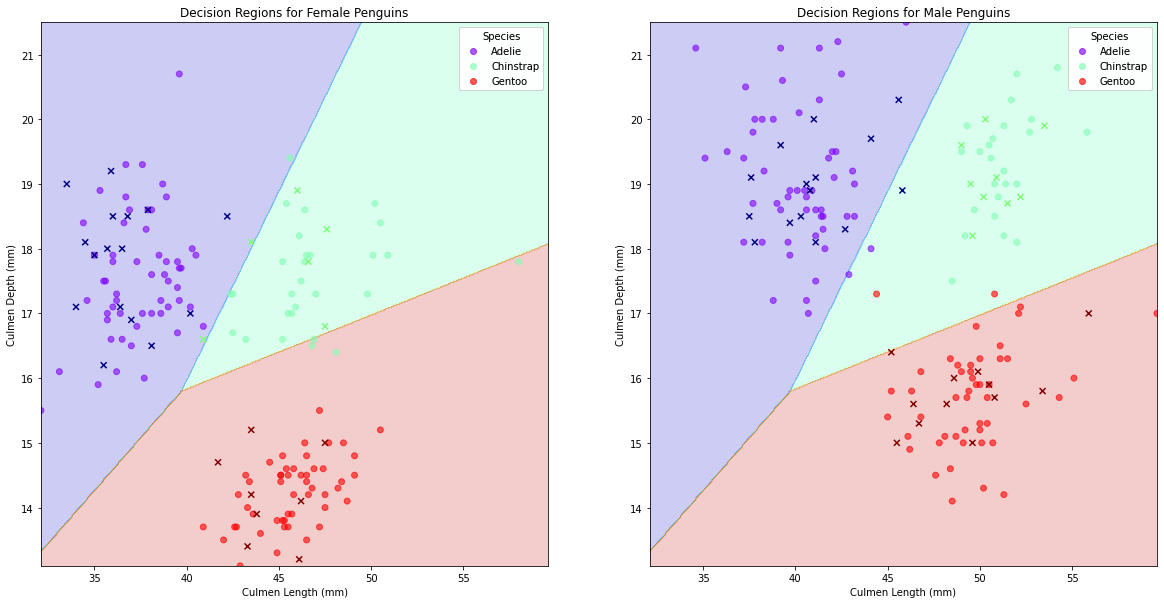

In [30]:
#Logistic Regression Decision Region
plot_regions(LR,X_train,y_train,t,X_test,y_test)

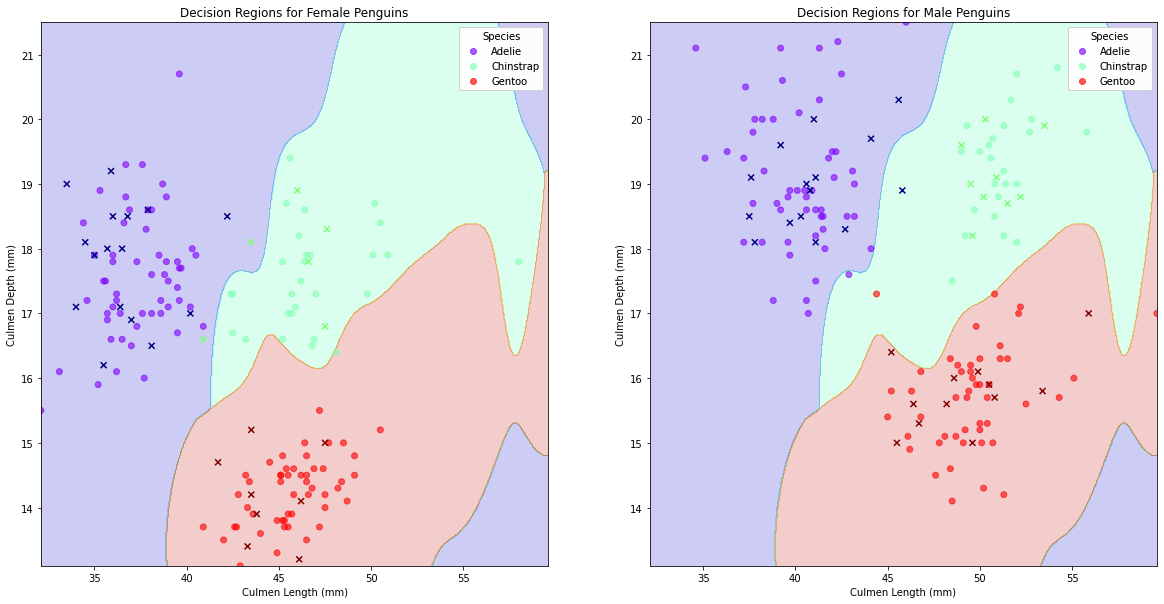

In [31]:
plot_regions(SVM,X_train,y_train,t,X_test,y_test)

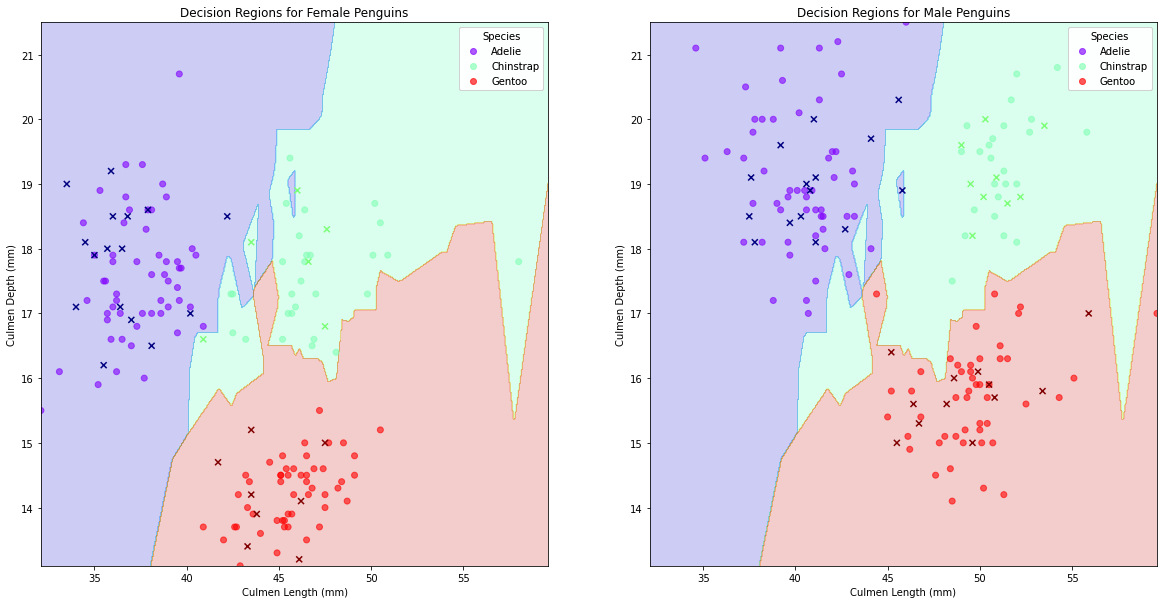

In [32]:
plot_regions(KNC,X_train,y_train,t,X_test,y_test)

One thing we would like to point out is that SVM and NNM scored around the same between cross-validation, the test data and the confusion matrix. This means that both models are good when it comes to interpreting the data it was given and can be used for future analyses. The only difference between the two is that the decision region for NNM has "sharper corners" whereas the SVM decision has "smoother corners". Regardless, you can see that the two are extremely similar. As for our Linear Regression model you can see that the different sets of data are much more seperated due to the fact that the "corner" of the graph is more centered. 




# Discussion 

The intention of this project was to find the best features (1 qualitative and 2 quantitative) that were predictive of a penguins species. We first implemented the data and split it into training and testing data which was used on different models. After this, we proceeded to clean the data for an exploratory analysis and to get rid of any unwanted information (row with a period, species in the predictor X, etc) and proceeded to analyze the data by creating tables of summary statistics. We then graphed different variables (scatterplot, boxplot, histogram) in order to observe any patterns/relationships within/between our data/variables. In order to choose our features, we used automated feature selection in order to choose the best variables that were predicitve of a given species and finally used those features on different models in order to see how the models would fare with the data given/how accurate these variables were. Overall, our models did a solid job of predicting a given species with unseen data. 


While our models showed good results when given the test data, there is always error when working with models that have unseen data:

First off, our logistic regression model shows that our model made many more errors than the confusion matrix claimed it did. The confusion matrix claimed that the model only made 2 errors but our decision regions for linear regression show many more points from the training and test data overlapped into different regions that they did not belong in. 

One problem faced with the support vector model was that we only worked with gamma g. Other paramters such as the kerenel and coefficent C likley would have produced another result. In future cases, one should play with more parameters in order to see if results would change to better understand why we got the results that we did. Another thing I would like to point out is that in the decision region one of the Gentoo points is in the Chinstrap region which of course we do not want and it looks like the gentoo region "drills". Another issue that should be noted is that the support vector model incorrectly predicted the species for 4 points in the data instead of the 3 that the confusion matrix said it did. This conflict raises questions about the validity of the model.

An issue we faced with the nearest neighbor model was that it seems to be slightly overfitted, especially when comparing it to the support vector model adn the logistic regression model, just because of the nature of the model. If we look at the decision regions, we notice that there are several 'islands' of color -- in the decision regions for the male penguins there is a blue 'island' in the green region. Although this 'island' is closest in distance to a blue point, we inuitively understand that it would make more sense for htis region to be green since it is inside of a larger green region. 
